In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os,sys
import pylab as plt
%matplotlib inline
from pylab import get_cmap
import glob


In [2]:
src_dir = '../src'
sys.path.append(src_dir)
from jsd import jsdalpha

In [3]:
src_meta = '../../gutenberg-frozen-2018-07-18/src/'
sys.path.append(src_meta)
from metaquery import meta_query


In [4]:
# Load meta data

In [5]:
meta=meta_query(path=src_meta+'../metadata/metadata.csv')

# Find all books that could have been written at a given time 

Note we only have the year of the authors' birth and death

In [13]:
## get all records that have information on yearofauthorbirth and yearof authordeath
meta.reset()
meta.filter_year([-10000,10000])

In [14]:
meta.df

,id,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
1,PG1,The Declaration of Independence of the United ...,"Jefferson, Thomas",1743.0,1826.0,['en'],653.0,"{'United States. Declaration of Independence',...",Text
3,PG3,John F. Kennedy's Inaugural Address,"Kennedy, John F. (John Fitzgerald)",1917.0,1963.0,['en'],81.0,{'Presidents -- United States -- Inaugural add...,Text
4,PG4,Lincoln's Gettysburg Address: Given November 1...,"Lincoln, Abraham",1809.0,1865.0,['en'],97.0,"{'Lincoln, Abraham, 1809-1865. Gettysburg addr...",Text
6,PG6,Give Me Liberty or Give Me Death,"Henry, Patrick",1736.0,1799.0,['en'],91.0,"{'Speeches, addresses, etc., American', 'Virgi...",Text
8,PG8,Abraham Lincoln's Second Inaugural Address,"Lincoln, Abraham",1809.0,1865.0,['en'],62.0,{'Presidents -- United States -- Inaugural add...,Text
9,PG9,Abraham Lincoln's First Inaugural Address,"Lincoln, Abraham",1809.0,1865.0,['en'],70.0,{'Presidents -- United States -- Inaugural add...,Text
15,PG15,Moby Dick,"Melville, Herman",1819.0,1891.0,['en'],761.0,"{'Adventure stories', 'Psychological fiction',...",Text
17,PG17,The Book of Mormon: An Account Written by the ...,"Smith, Joseph, Jr.",1805.0,1844.0,['en'],245.0,{'Church of Jesus Christ of Latter-day Saints ...,Text
18,PG18,The Federalist Papers,"Jay, John",1745.0,1829.0,['en'],477.0,{'Constitutional history -- United States -- S...,Text
19,PG19,The Song of Hiawatha,"Longfellow, Henry Wadsworth",1807.0,1882.0,['en'],220.0,{'Iroquois Indians -- Kings and rulers -- Poet...,Text


In [16]:
hmin = 20 ## consider minimum age to write a book as 20
list_tmin = np.array(meta.df['authoryearofbirth'])+hmin
list_tmax = np.array(meta.df['authoryearofdeath'])

In [21]:
t1 = min(list_tmin)
t2 = max(list_tmax)

arr_t = np.arange(t1,t2+1,1)
print(arr_t)
arr_n = 0*arr_t
for i_t,t in enumerate(arr_t):
    n = len( np.where( (list_tmin<=t)&(list_tmax>=t) )[0] )
    arr_n[i_t] = n

[ -730.  -729.  -728. ...,  2013.  2014.  2015.]


# Plot

In [27]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 510  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = (np.sqrt(5)-1.0)/2.0 # Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
fig_size = [fig_width,fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'backend': 'ps',
          'axes.titlesize':16,
          'axes.labelsize': 14,
          'text.fontsize': 12,
          'legend.fontsize': 12,
#           'figtext.fontsize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          
          'text.usetex': True,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          'text.latex.unicode':True,
          'text.latex.preamble': [r'\usepackage{bm}'],
          
          'xtick.direction':'out',
          'ytick.direction':'out',
          
          'axes.spines.right' : False,
          'axes.spines.top' : False
         }
plt.rcParams.update(params)

/home/martin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


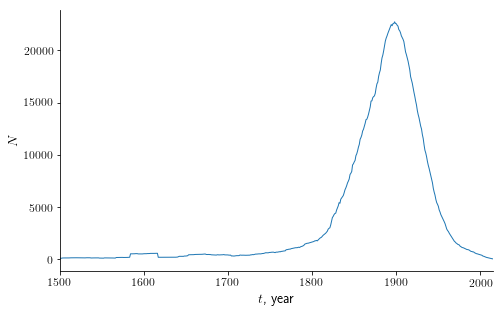

In [28]:
## note that there are some (few) books B.C.
## --> could be added as inset

x = arr_t
y = arr_n


# f=plt.figure(figsize = (10,20))
f=plt.figure()
ax=f.add_subplot(1,1,1)


ax.plot(x,y,lw=1)
ax.set_xlabel(r'$t$, year')
ax.set_ylabel(r'$N$')

ax.set_xlim(1500,2015)
# ax.set_ylim(1,10**5)

# ax.set_xlim(10**0,10**6)
# ax.set_xscale('log')
# ax.set_yscale('log')
# plt.subplots_adjust(left=0.1,bottom=0.4)

path_save = os.path.join(os.pardir,'figures')
fname_save = 'basicstats-time.pdf'
filename = os.path.join(path_save,fname_save)
plt.savefig(filename)